In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing 

In [2]:
# Loading dataset
df = pd.read_csv('houses.csv')
df.head()

,size(sqft),bedrooms,floors,age,Price($1k)
0,952.0,2.0,1.0,65.0,272.0
1,1240.0,3.0,1.0,64.0,300.0
2,1950.0,3.0,2.0,17.0,510.0
3,1730.0,3.0,2.0,42.0,394.0
4,1960.0,3.0,2.0,15.0,540.0


In [3]:
# Checking for null values
null_values = df.isnull().sum()
null_values

size(sqft)    0
bedrooms      0
floors        0
age           0
Price($1k)    0
dtype: int64

In [4]:
# Extracting feature names
features = [x for x in df.columns if x not in df.columns[-1]] # Removing our target variable
features

['size(sqft)', 'bedrooms', 'floors', 'age']

In [5]:
# Extracting target name
target = df.columns[-1]  
target

'Price($1k)'

### Splitting dataset into features and target

In [6]:
# converting the dataframe(dataset) into numpy array
dataset = np.array(df)
dataset[:5]

array([[9.52e+02, 2.00e+00, 1.00e+00, 6.50e+01, 2.72e+02],
       [1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01, 3.00e+02],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01, 5.10e+02],
       [1.73e+03, 3.00e+00, 2.00e+00, 4.20e+01, 3.94e+02],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01, 5.40e+02]])

In [7]:
# Slicing features columns only
X = dataset[:,:4]
print(X[:5])
print(X.shape)

[[9.52e+02 2.00e+00 1.00e+00 6.50e+01]
 [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.73e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]]
(100, 4)


In [8]:
# Slicing target column only
y = dataset[:,4]
print(y.shape)
print(y[:5])

(100,)
[272. 300. 510. 394. 540.]


### Feature vs target plot

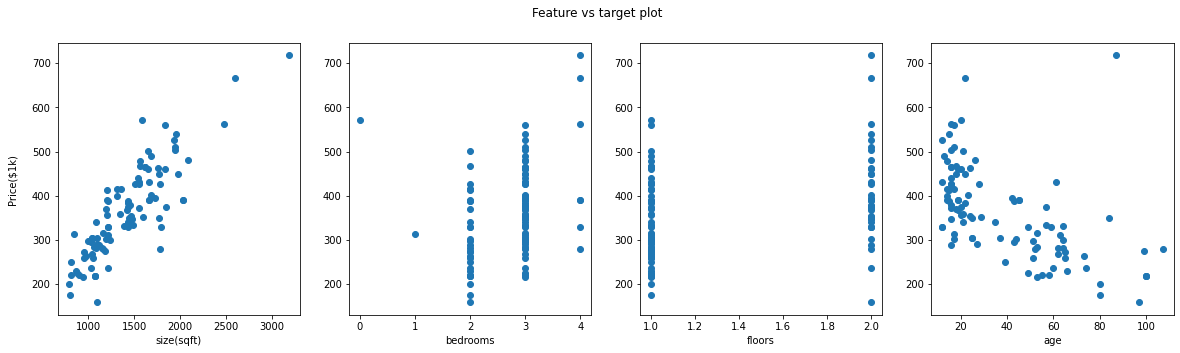

In [9]:
# getting no. of features
m = X.shape[1]

# creating a plot of each feature and target
fig, ax = plt.subplots(1,m, figsize=(20,5))
for i in range(m):
    ax[i].scatter(X[:,i], y)
    ax[i].set_xlabel(features[i])
fig.suptitle('Feature vs target plot')
fig.text(0.09, 0.5, target , va='center', rotation='vertical')
plt.show()

### Splitting dataset into train, test and validation set

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [11]:
# Get 60% of the dataset as the training set
x_train, x_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=1)

# Split remaining 40% of dataset in two halves i.e. validation set and test set  
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=1)

# Model selection and evaluation

### Adding Polynomial features

In [12]:
# training error 
train_mse = []

# cross-validation error 
cv_mse = []

# saving scaler to transform test or prediction data
scalers = []

# saving models with diff polynomial degree
models = []

for degree in range(1,11):
    
    # Adding polynomial features 
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_poly = poly.fit_transform(x_train)
    
    # Scaling the features
    scaler = StandardScaler()
    x_train_poly_scaled = scaler.fit_transform(x_train_poly)
    # Appending scaler for each polynomial degree
    scalers.append(scaler)
    
    # Train the model
    model = LinearRegression()
    model.fit(x_train_poly_scaled, y_train)
    # Appending model for each polynomial degree
    models.append(model)
    
    # Calculate the Training MSE
    pred = model.predict(x_train_poly_scaled)
    train_mse_i = mean_squared_error(y_train, pred)/2
    # Appending Training MSE for each polynomial degree
    train_mse.append(train_mse_i)
    
    # Adding Polynomial feature to the validation set and scaling the validation set
    x_cv_poly = poly.transform(x_cv)
    x_cv_poly_scaled = scaler.transform(x_cv_poly)
    
    # Calculating the valiation MSE
    pred = model.predict(x_cv_poly_scaled)
    cv_mse_i = mean_squared_error(y_cv, pred)/2
    # Appending Cross Validation MSE for each polynomial degree
    cv_mse.append(cv_mse_i)
    

### Choosing the best model
Model with lowest cross validation mean square erro

In [13]:
# Mean squared error of training set varying with polynomial degree
train_mse

[225.92037348605143,
 158.40001234336447,
 62.305409337568335,
 19.687068183256454,
 1.7310198385381984e-16,
 4.2280709732016826e-18,
 1.7057218630601926e-19,
 1.5388350567983474e-19,
 3.963806481962256e-19,
 3.0668167866393116e-19]

In [14]:
# Mean squared error of validation set varying with polynomial degree
cv_mse

[233.27420374892472,
 1653.346716587054,
 6.143632558279812e+22,
 17977803.12355829,
 177333534185.2563,
 443219038.5430272,
 52583067.09820856,
 579764387.6690074,
 1439906211.1597738,
 2387911780.5079055]

In [15]:
# Plot degree and mean squared errors
def plot(degree):
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].plot(degree, train_mse[degree[0]-1:degree[-1]])  # degree --> 1 to 10, indices --> 0 to 9
    ax[0].set_xlabel('degree')  
    ax[0].set_ylabel('Training MSE ( J_train )')
    ax[1].plot(degree, cv_mse[degree[0]-1:degree[-1]])
    ax[1].set_xlabel('degree')
    ax[1].set_ylabel('Cross Validation MSE ( J_cv )')
    fig.suptitle('Traning MSE, Validation MSE VS Degree ')


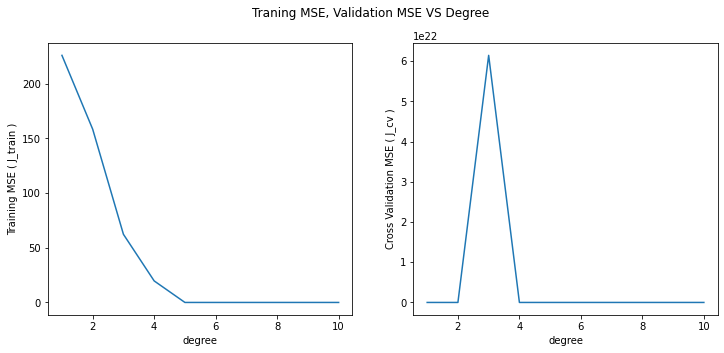

In [16]:
# Plotting the change in Training and Validaiton MSE with respect to degree
degree = np.arange(1,11)
plot(degree)

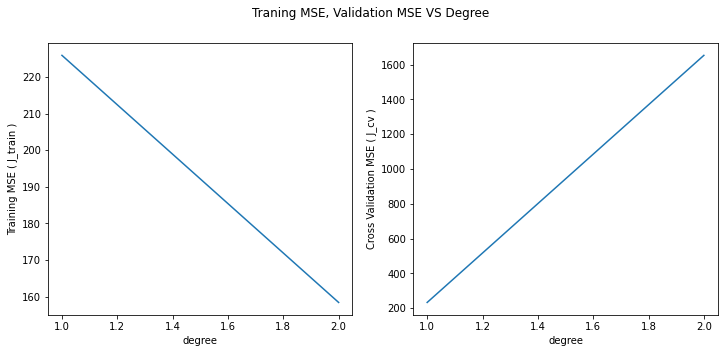

In [17]:
# plotting for only degrees 1 and 2
degree= range(1,3)
plot(degree)

In [18]:
# best polynomial degree is the degree with the least validation error
degree = np.argmin(cv_mse)+1  # +1 becuase index = degree - 1
print(f'The best polynomial degree is {degree}')

The best polynomial degree is 1


In [19]:
# selecting the best model from models array
best_model = models[degree-1]

## Test Error OR Generalization Error

In [20]:
# adding polynomial feature to the test set
poly = PolynomialFeatures(degree, include_bias = False)
x_test_poly = poly.fit_transform(x_test)
x_test_poly_scaled = scalers[degree-1].transform(x_test_poly)

# making prediction on test dat
pred = best_model.predict(x_test_poly_scaled)

# calculating test mean squared error
test_mse = mean_squared_error(y_test, pred)

# Comparing all the Mean squared errors
print(f'Training set Mean square error = {train_mse[degree-1]:.4f}')
print(f'Cross Validation set Mean square error = {cv_mse[degree-1]:.4f}')
print(f'Test set Mean square error = {test_mse:.4f}')

Training set Mean square error = 225.9204
Cross Validation set Mean square error = 233.2742
Test set Mean square error = 369.8431


In [21]:
# model score
best_model.score(x_test_poly_scaled, y_test)

0.9640406996179519

## Saving the model and Scaler

In [22]:
import joblib

In [23]:
# saving the best model
joblib.dump(best_model, 'saved_model.joblib')

# saving scaler
joblib.dump(scalers[degree-1], 'saved_scaler.joblib')

# saving polynomial features
joblib.dump(poly, 'saved_poly.joblib')

['saved_poly.joblib']

## Making prediction using the saved model

In [67]:
# loading the trained model
saved_model = joblib.load('saved_model.joblib')

# loading scaler
saved_scaler = joblib.load('saved_scaler.joblib')

# loading polynomial features
saved_poly = joblib.load('saved_poly.joblib')

In [70]:
# taking input features to make predicting
print('Enter the following data:\n')
x_input = []
for i in range(len(features)):
    print(features[i])
    x_i = float(input())
    x_input.append(x_i)

# converting input into numpy array
x_input = np.array(x_input).reshape(1, len(features))
x_input

Enter the following data:

size(sqft)
1200
bedrooms
3
floors
2
age
20


array([[1200.,    3.,    2.,   20.]])

In [71]:
# adding polynomial features
x_input_poly = saved_poly.transform(x_input)

# scaling the input features
x_input_scaled = saved_scaler.transform(x_input_poly)

# making prediction
pred = saved_model.predict(x_input_scaled)

# displaying the predicted value
print(f'The housing price is expected to be: ${pred[0]:.3f} thousand ')

The housing price is expected to be: $275.704 thousand 
